In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
    Importing Heart Disease Dataset
</h1>
 Importing Dataset

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease1/heart_disease.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [4]:
df.describe()

Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0.003647   
25%       5.449866          176.000000            99.000000     3.674126   
50%       7.003252          250.000000           120.000000     7.472164   
75%       8.531577          326.000000           141.000000    11.255592   
max       9.999952          400.000000           160.000000    14.997087   

       Homocysteine Level  
count         9980.000000  
mean            12.456271  
std              4.323426  
min              5.000236  
25%              8.723334  
50%             12.409395  
75%             16.140564  
max             19.999037

In [5]:
df.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
    Data Cleaning
</h1>


In [6]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [7]:
columns_fill=['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours','Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level']

for column in columns_fill:
    df[column].fillna(df[column].median(),inplace=True)

In [8]:
columns_obj=['Exercise Habits','Smoking','Family Heart Disease','Diabetes','High Blood Pressure','High LDL Cholesterol','Low HDL Cholesterol','Alcohol Consumption','Stress Level','Sugar Consumption']

for columns in columns_obj:
    df[columns].fillna(df[columns].mode()[0], inplace=True)


 <h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
    Exploratory Data Analysis (EDA)
</h1>
Exploratory Data Analysis (EDA) is an essential first step in any data analysis or machine learning pipeline. It involves examining your dataset to summarize its main characteristics and understand the relationships between variables before applying any modeling or statistical tests.

The goal of EDA is to gain insights into the data, identify patterns, detect outliers, check assumptions, and ensure the data is in a good state for further analysis.

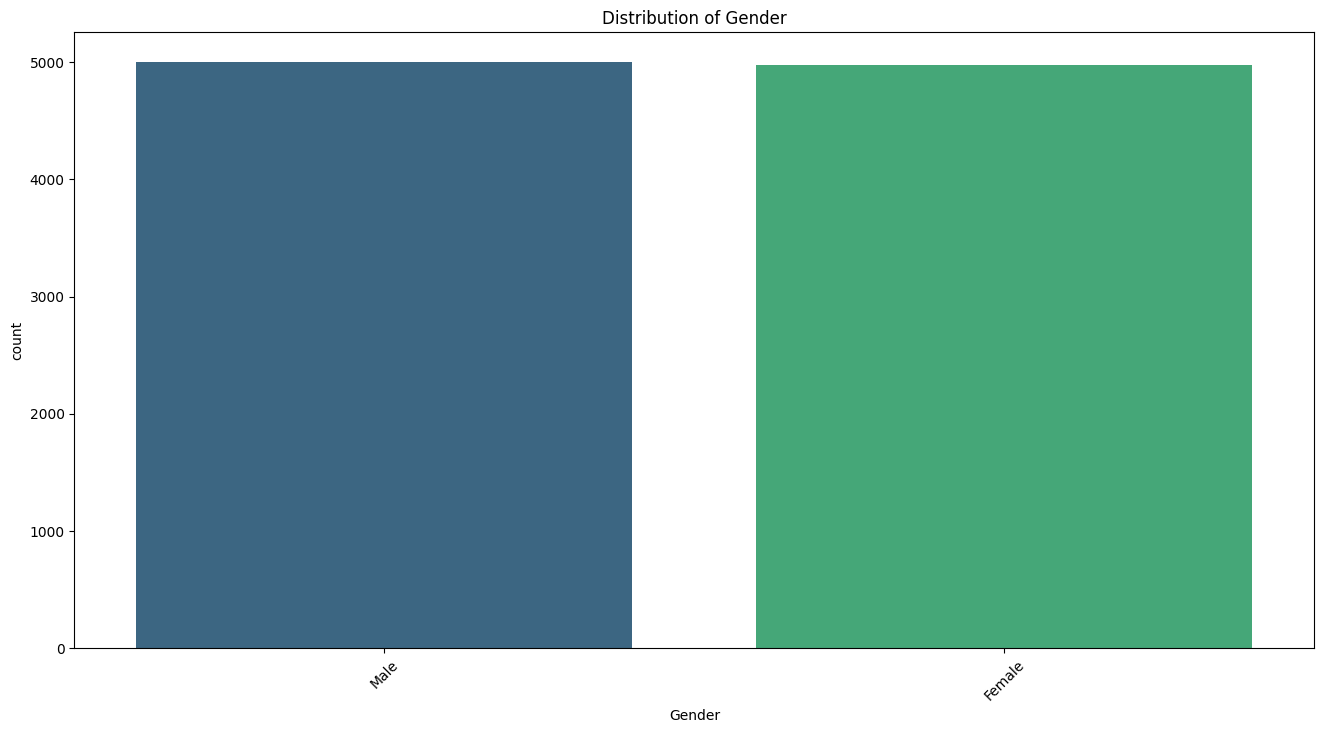

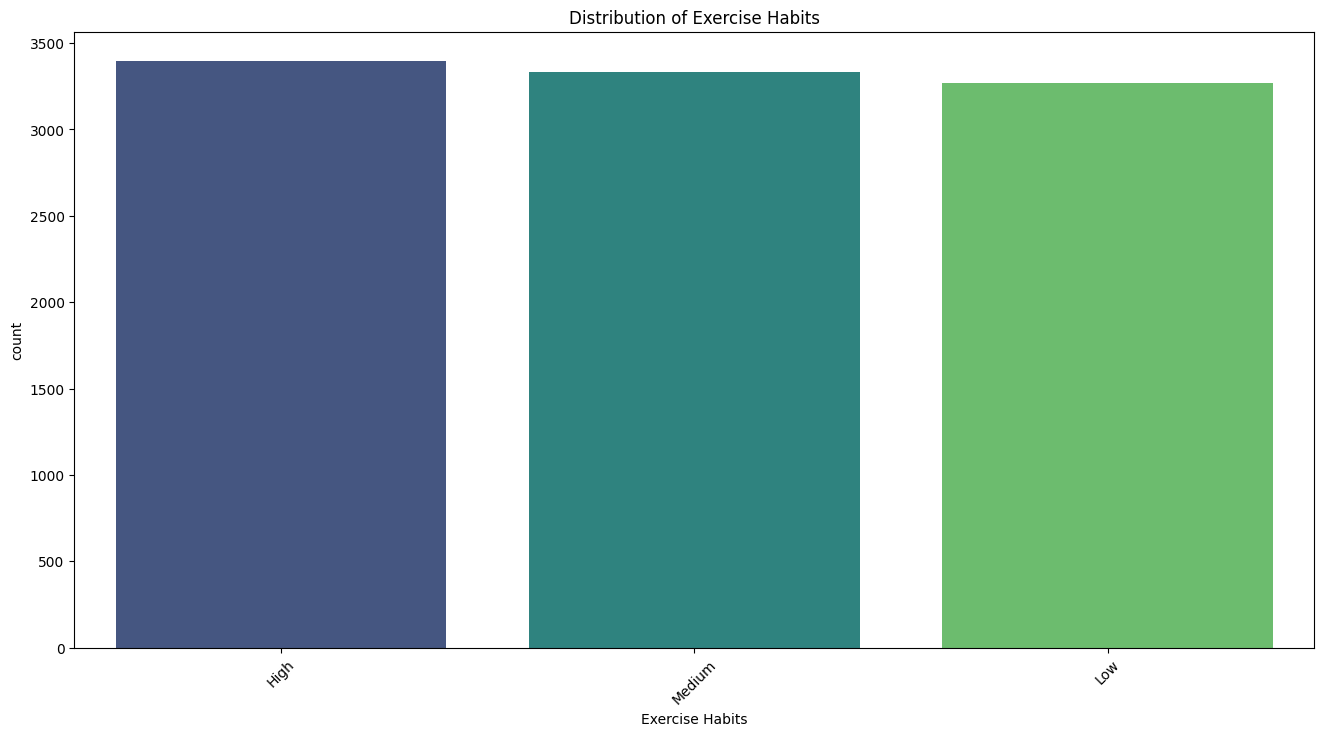

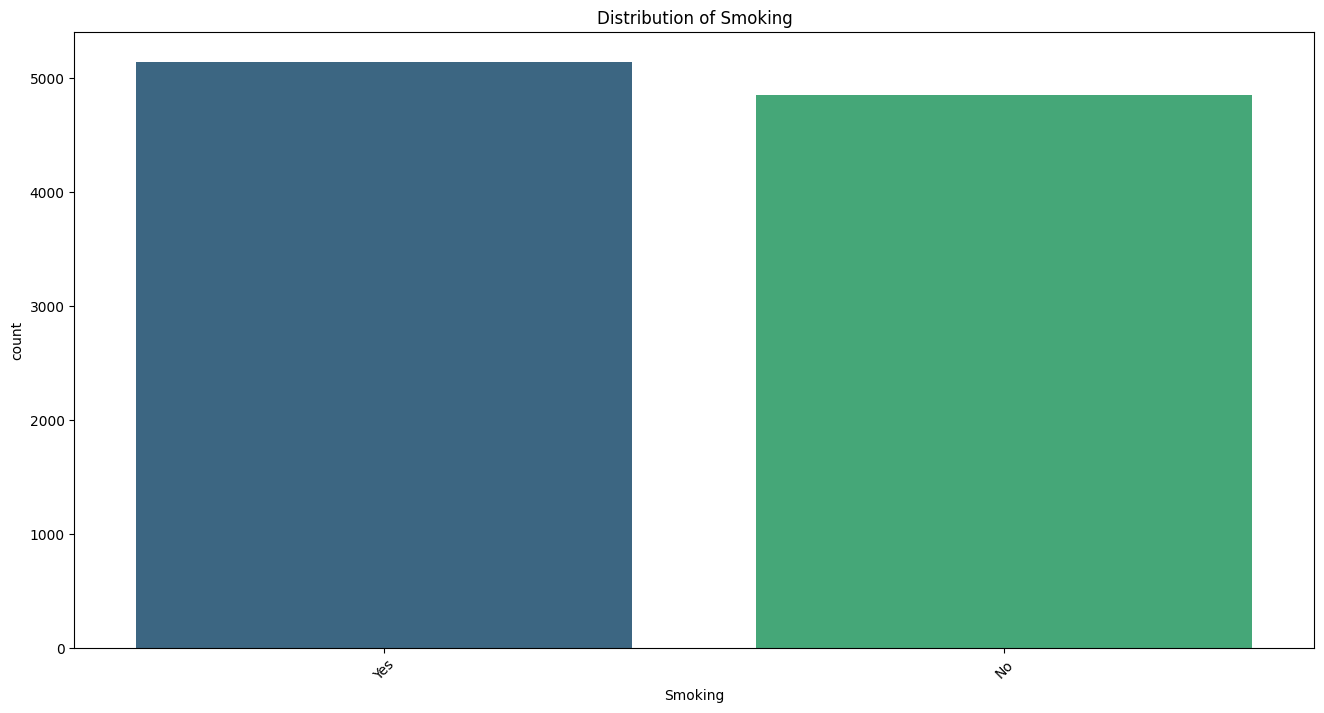

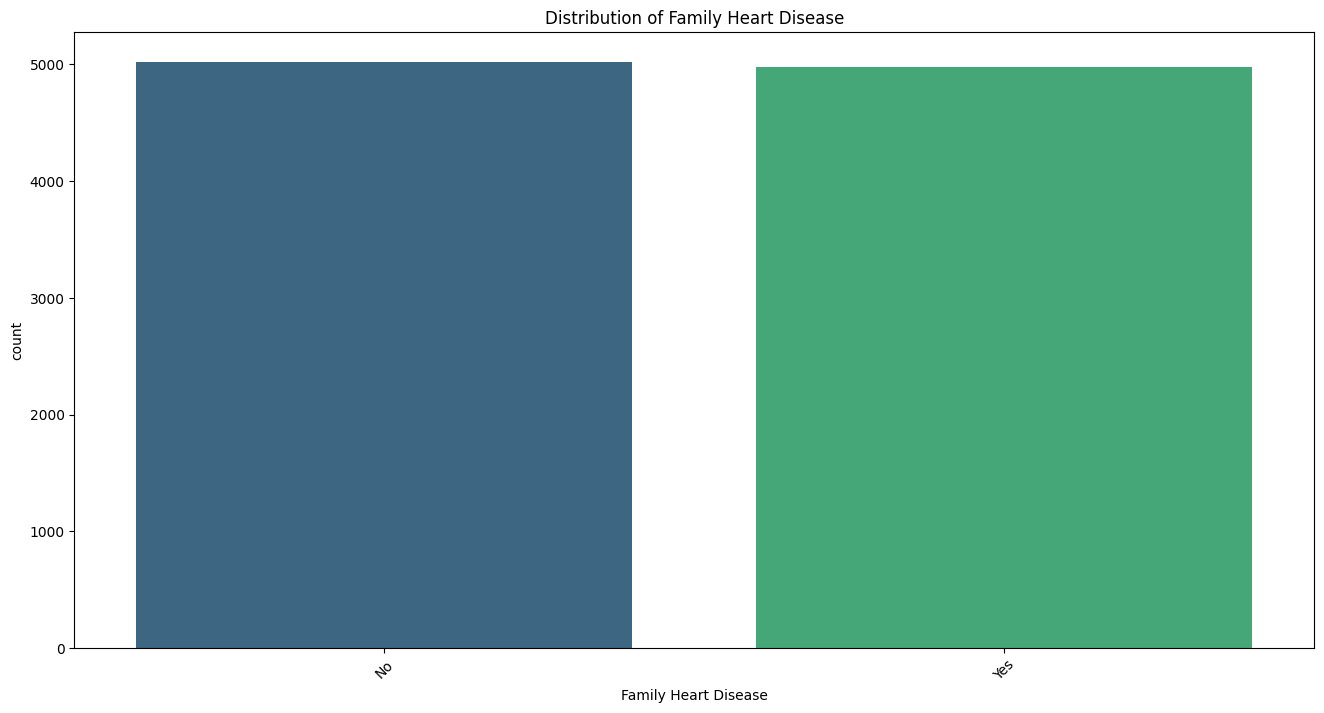

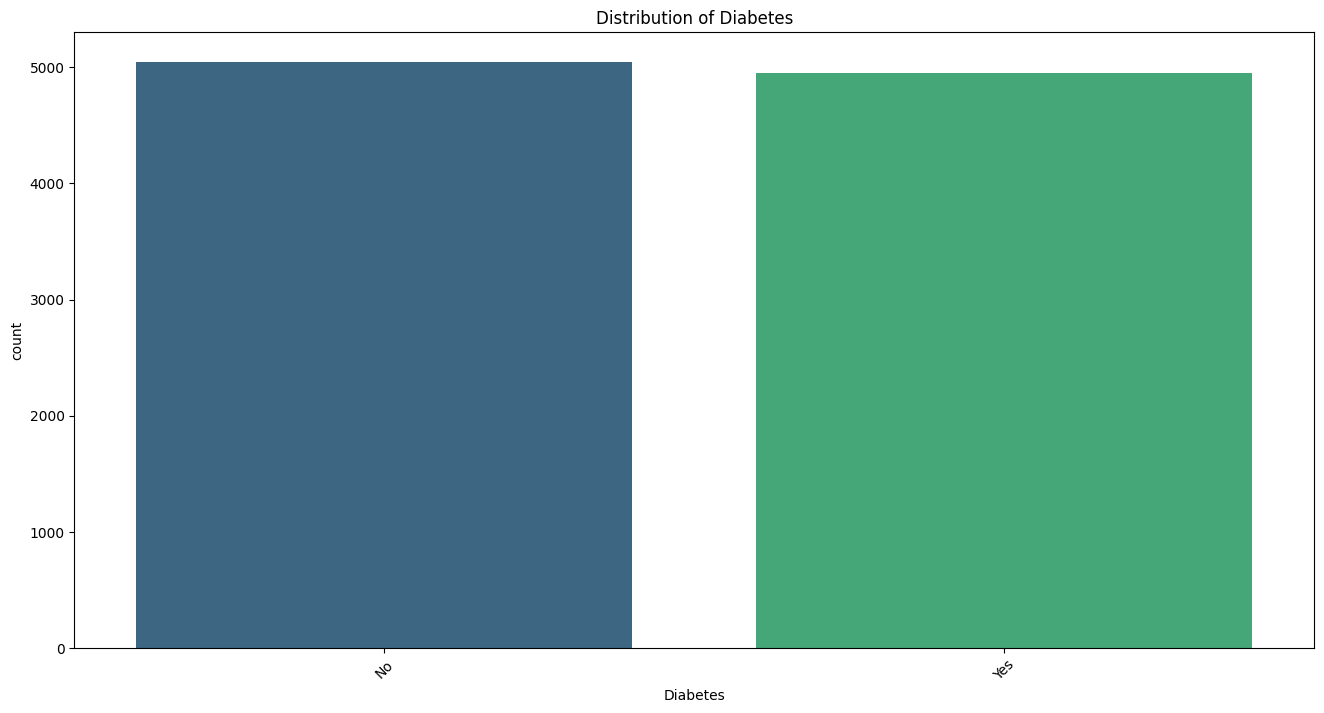

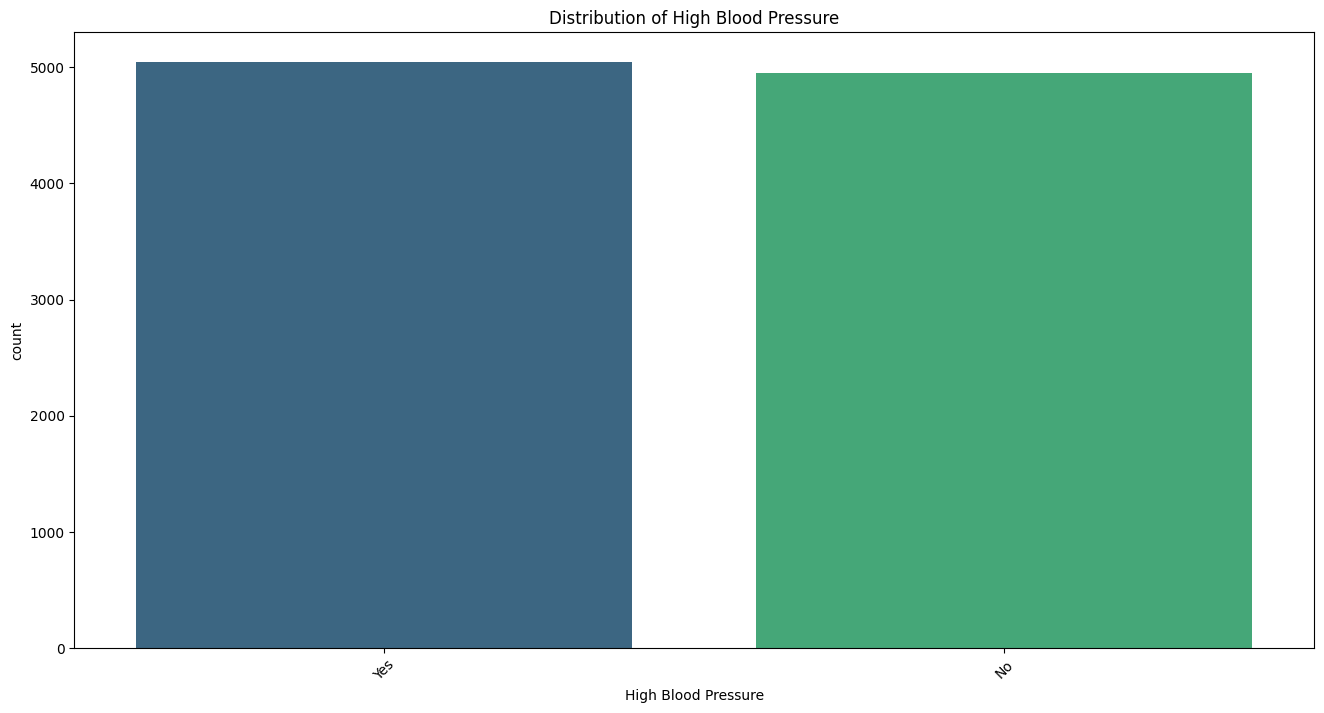

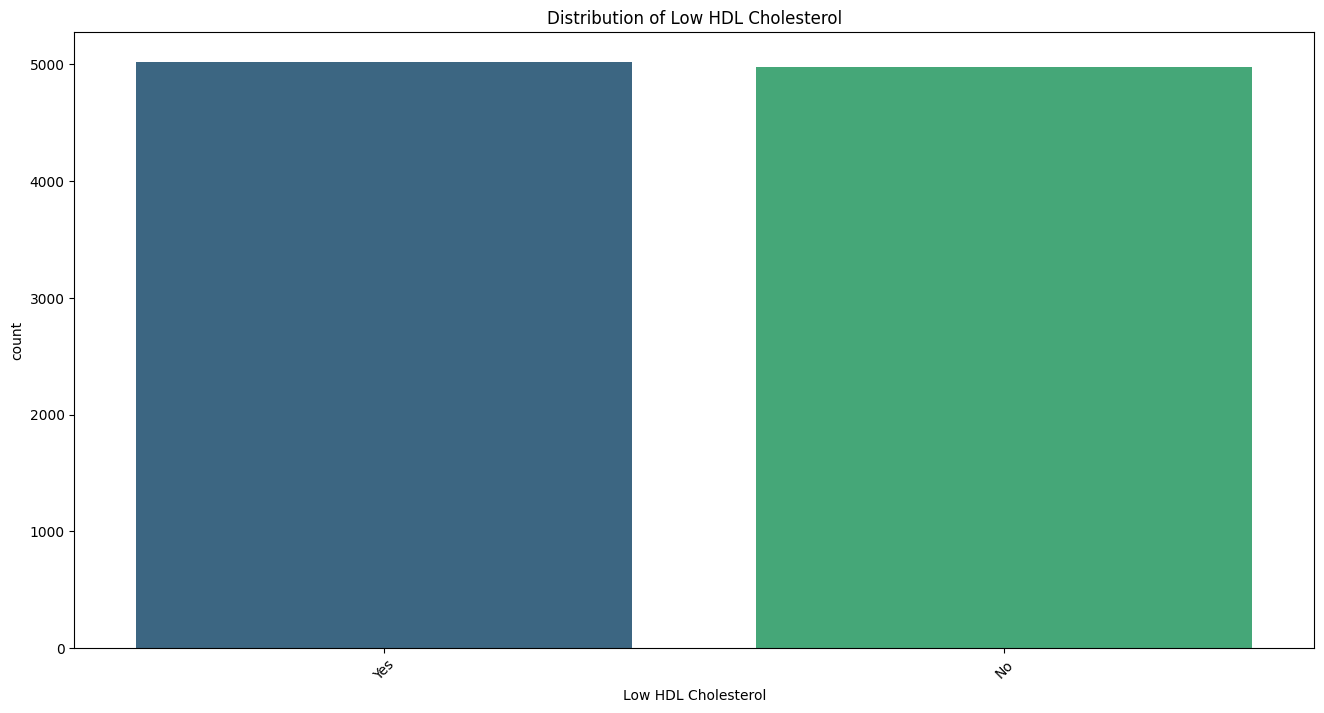

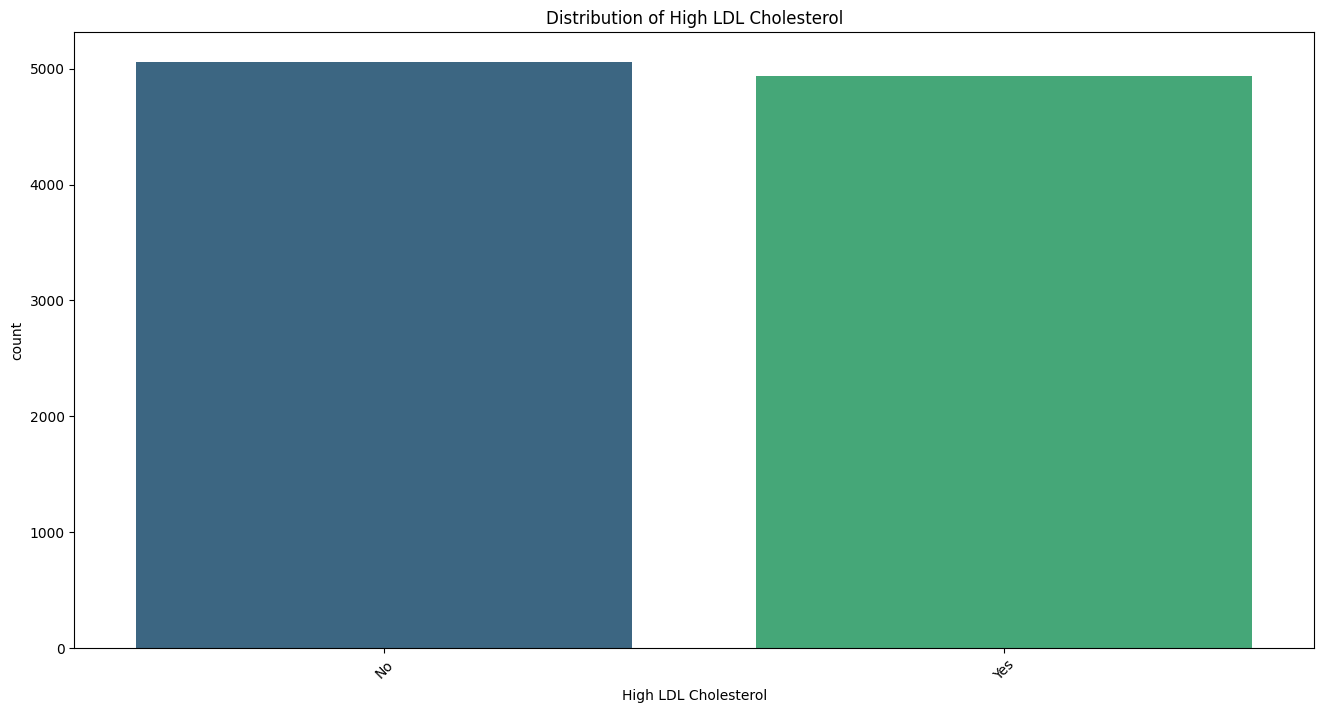

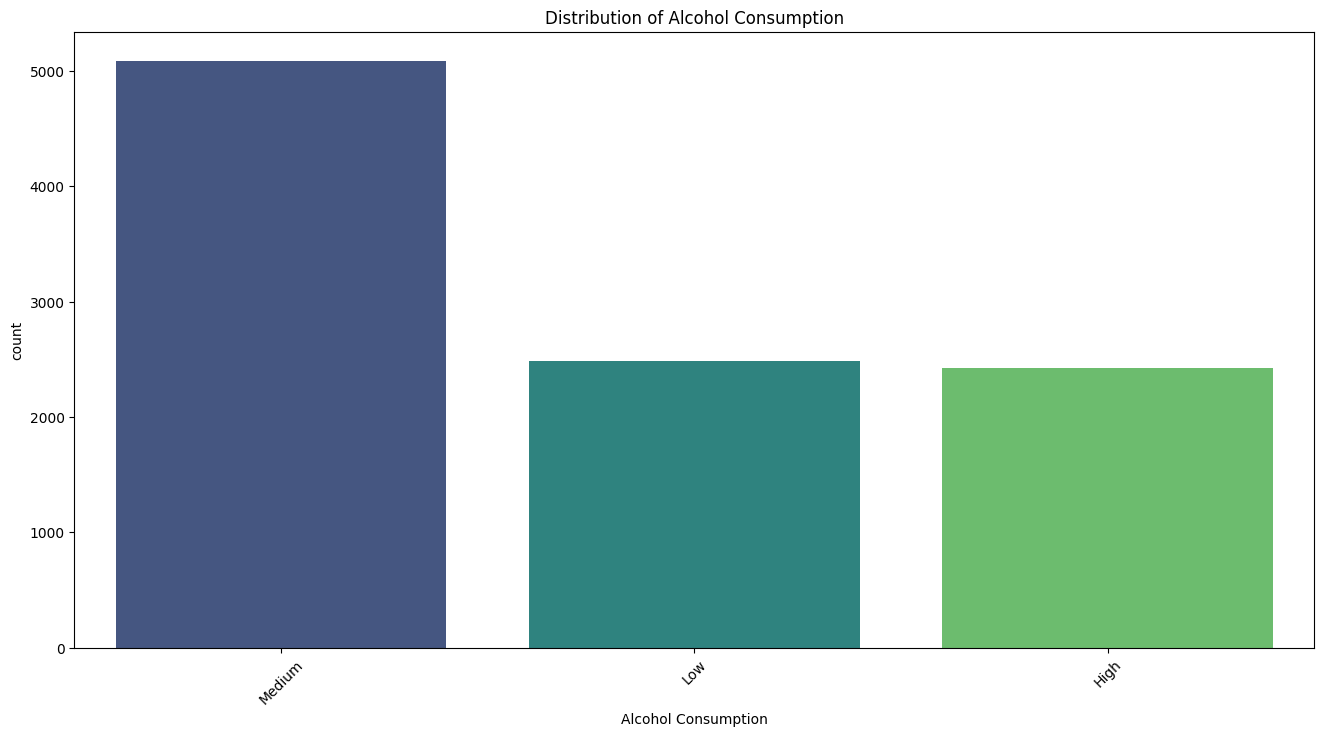

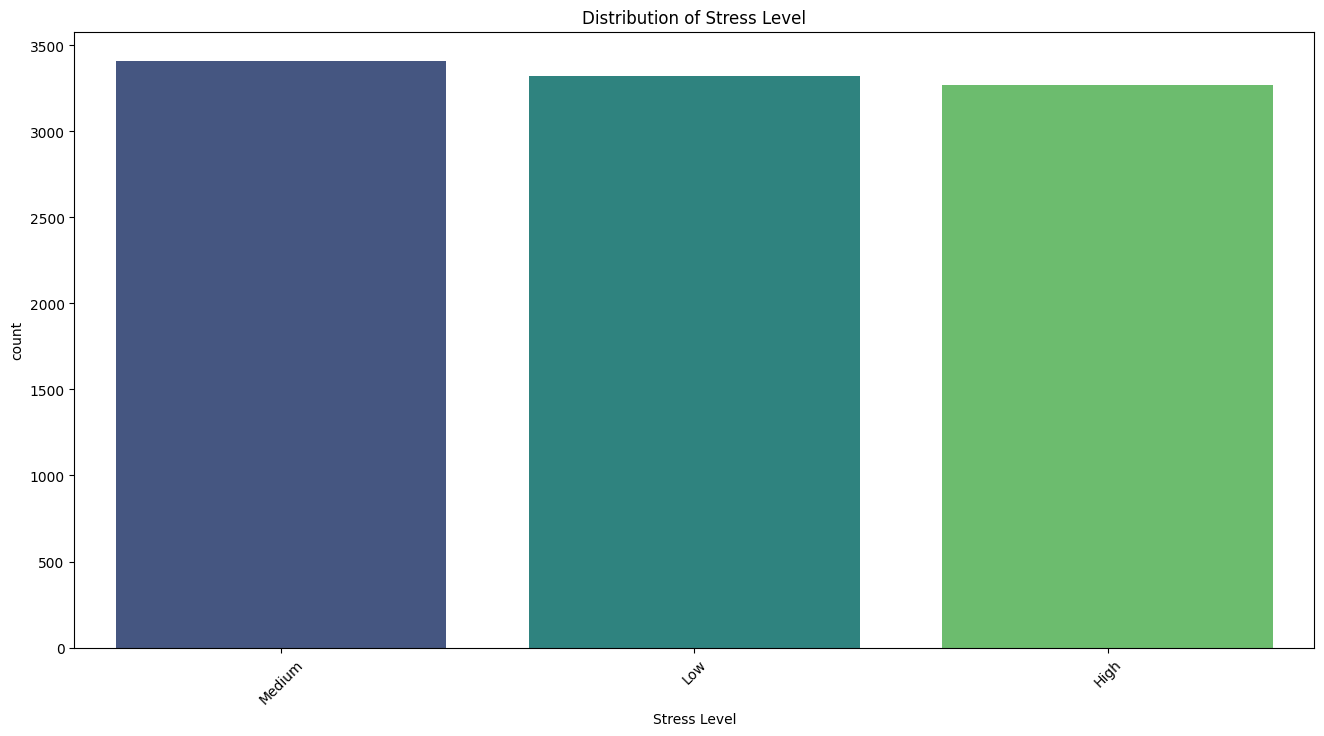

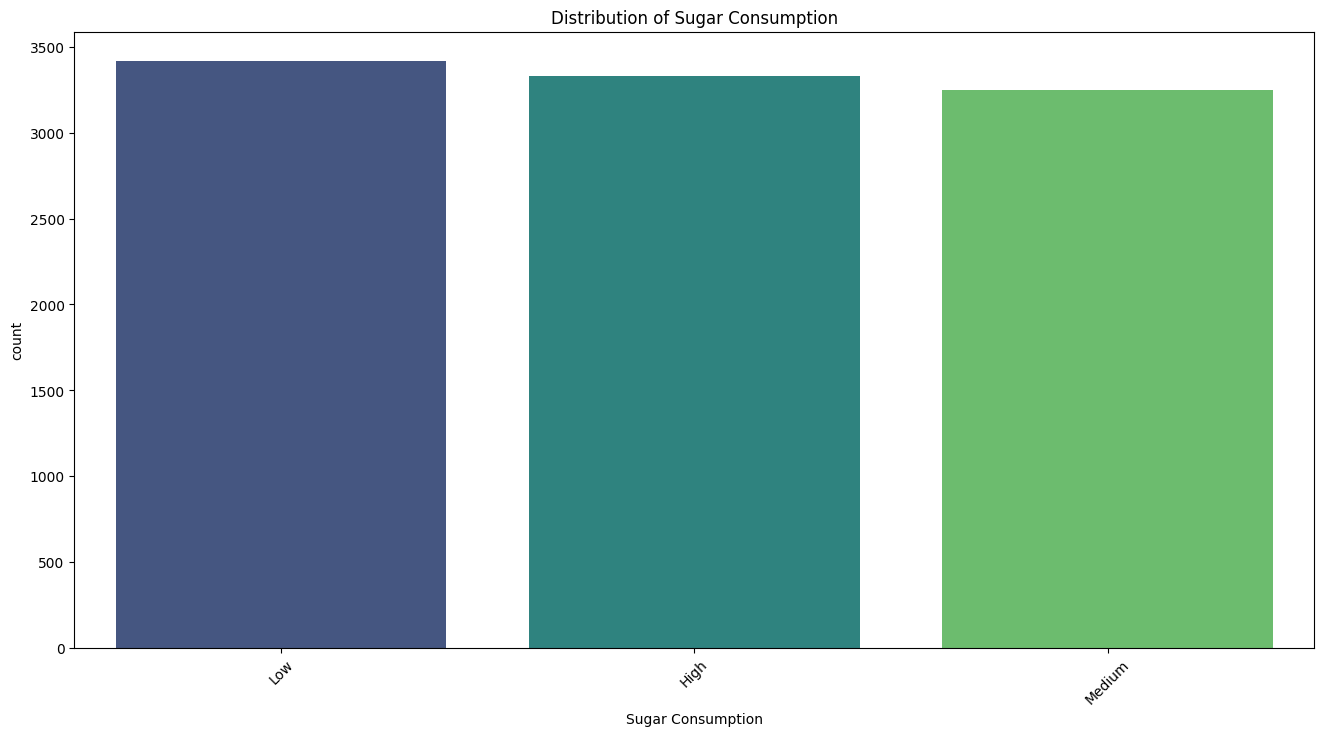

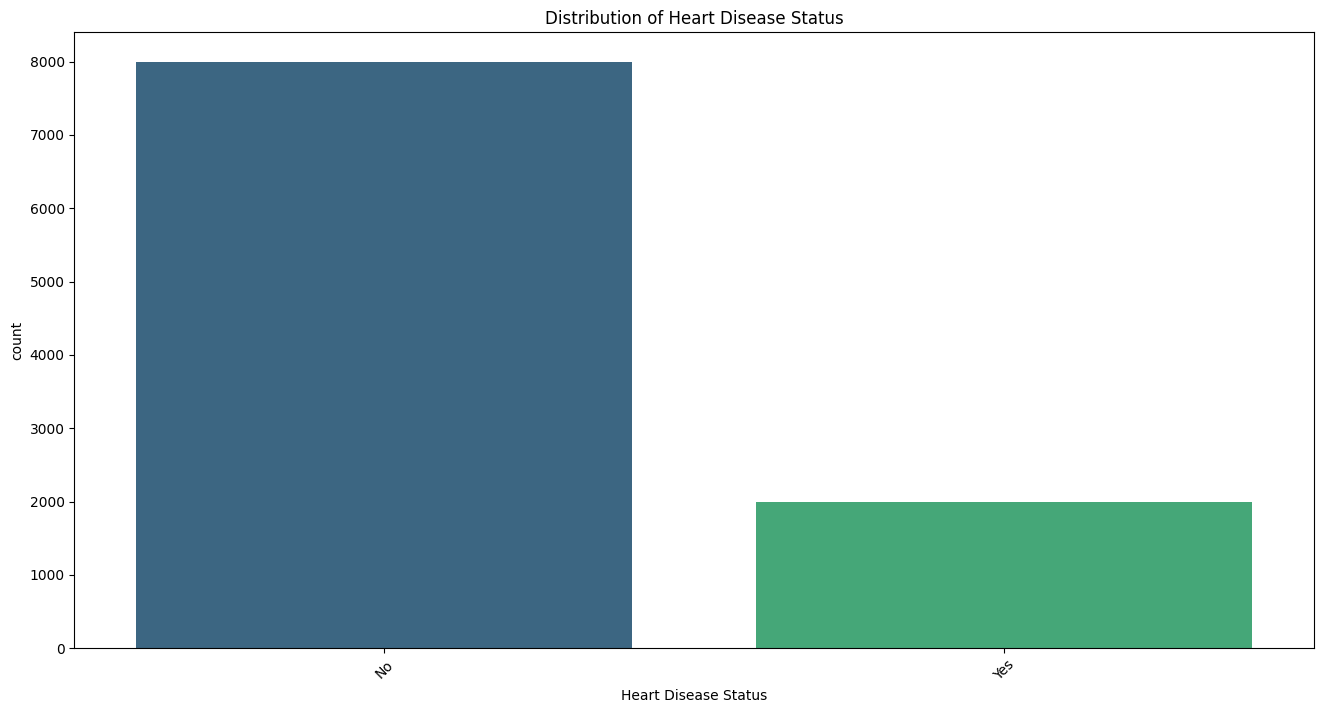

In [9]:
import matplotlib.pyplot as plt
categorical_col=['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sugar Consumption','Heart Disease Status']
for col in categorical_col:
    plt.figure(figsize=(16,8))
    sns.countplot(data=df,x=col,palette="viridis",order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

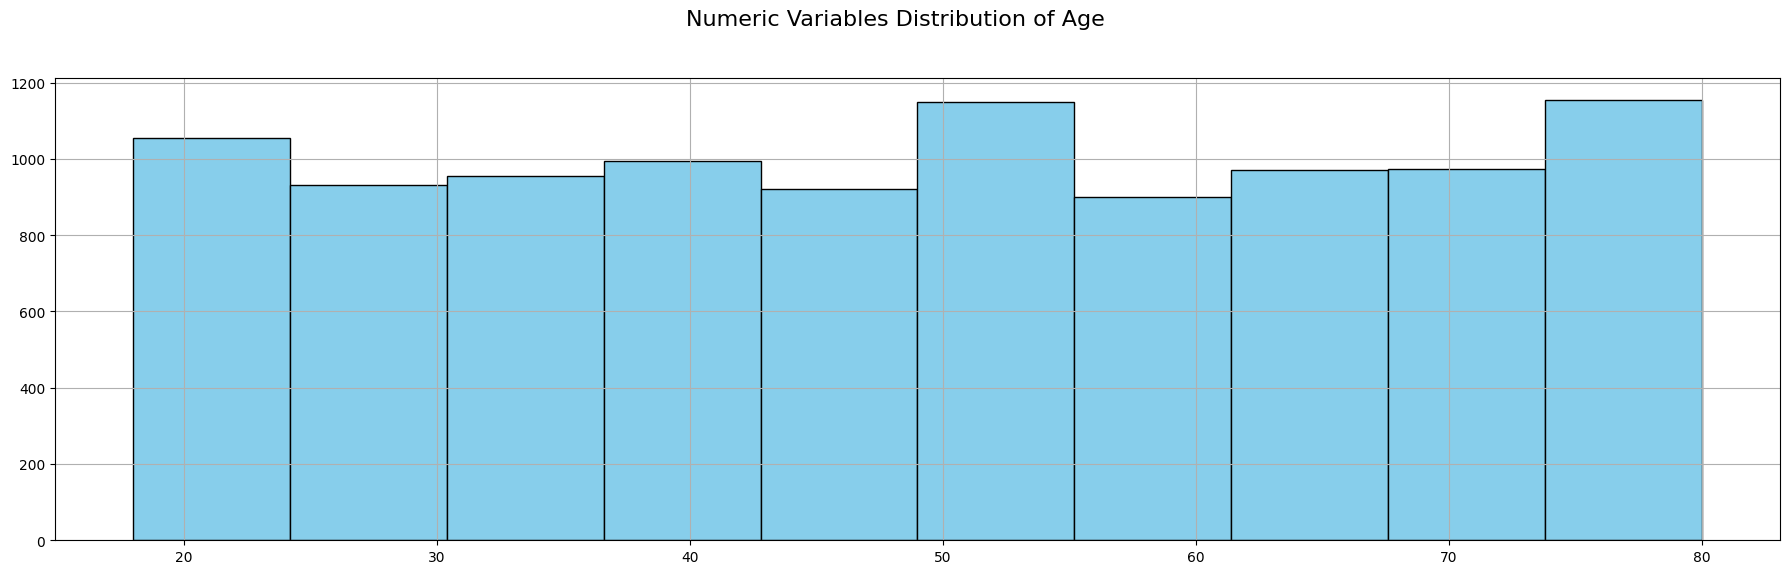

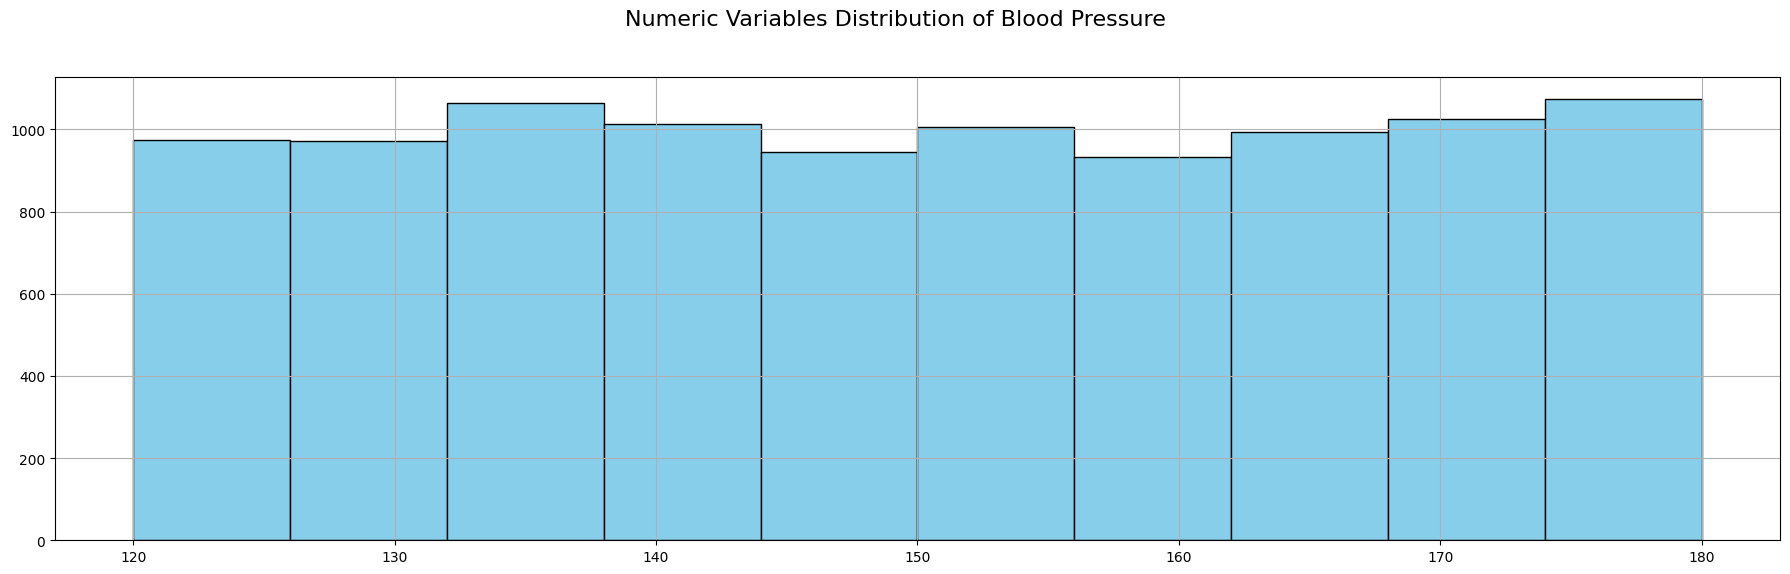

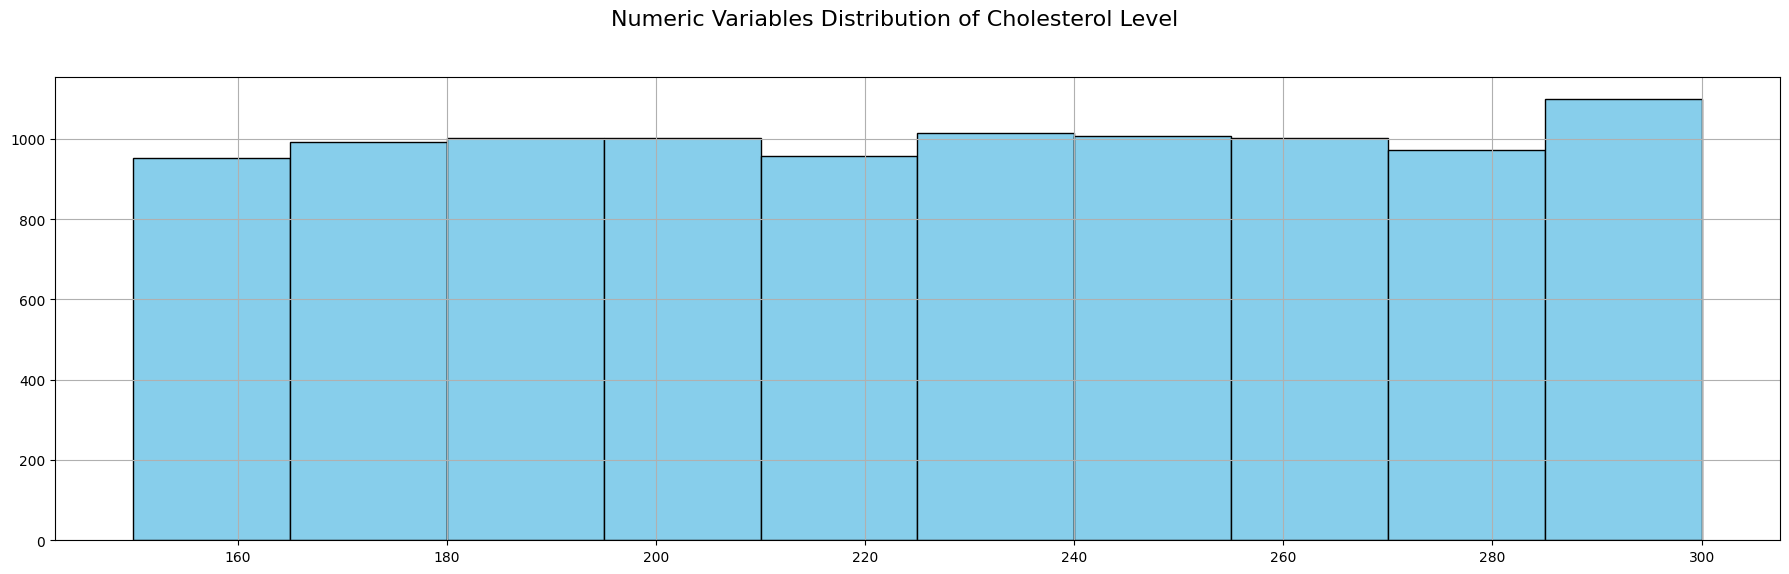

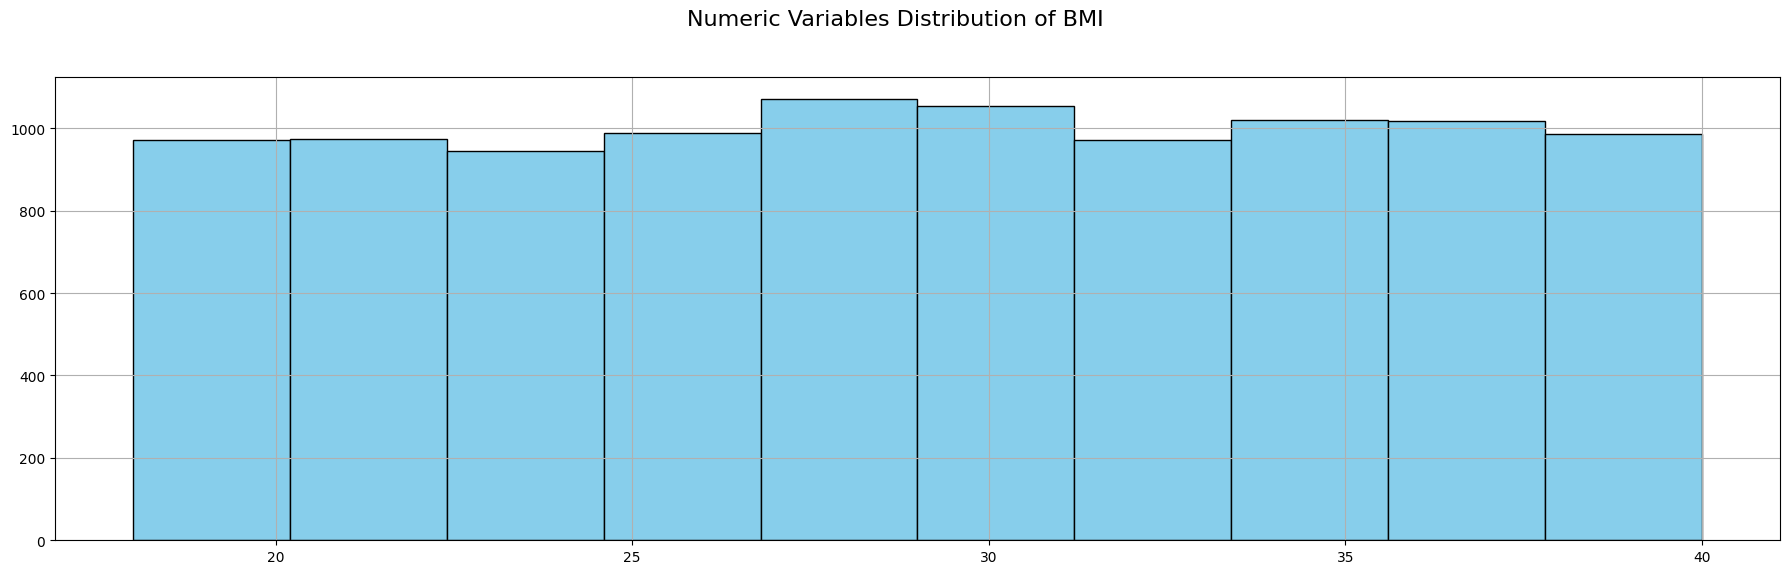

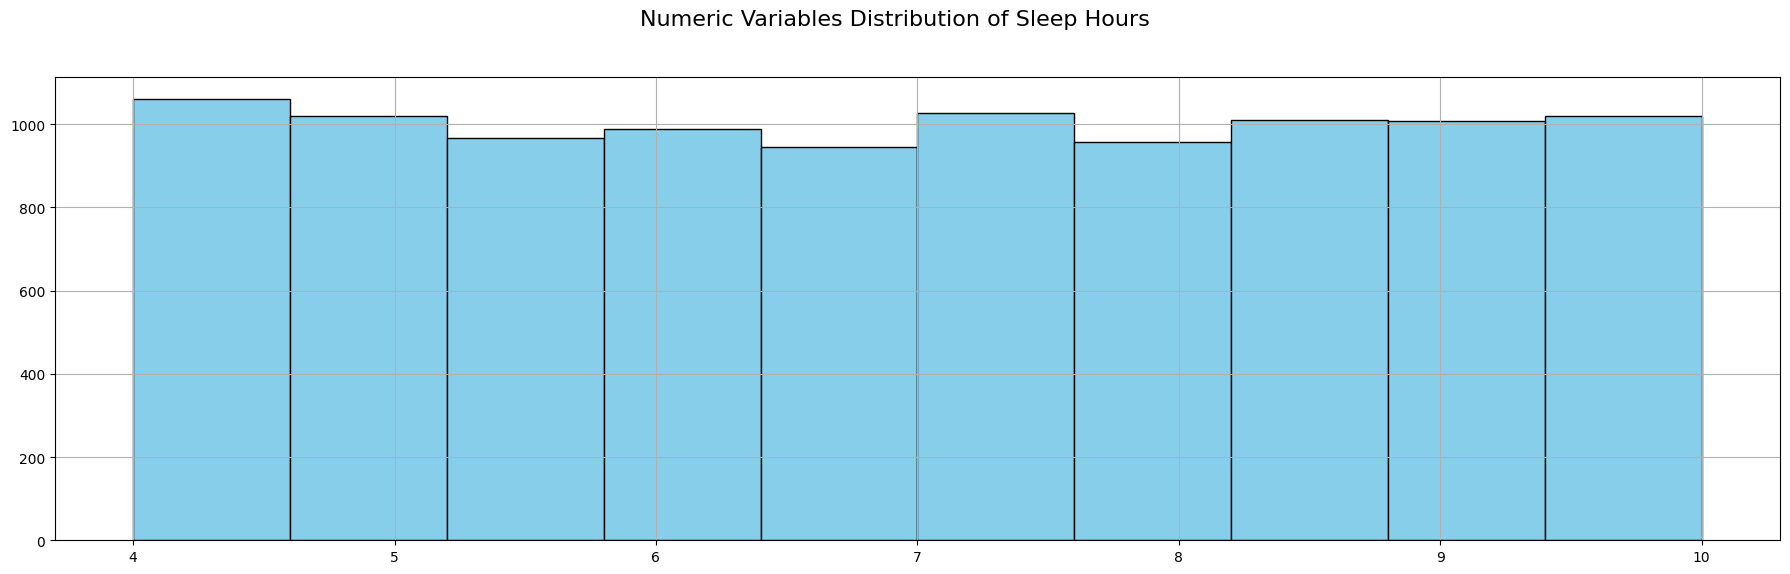

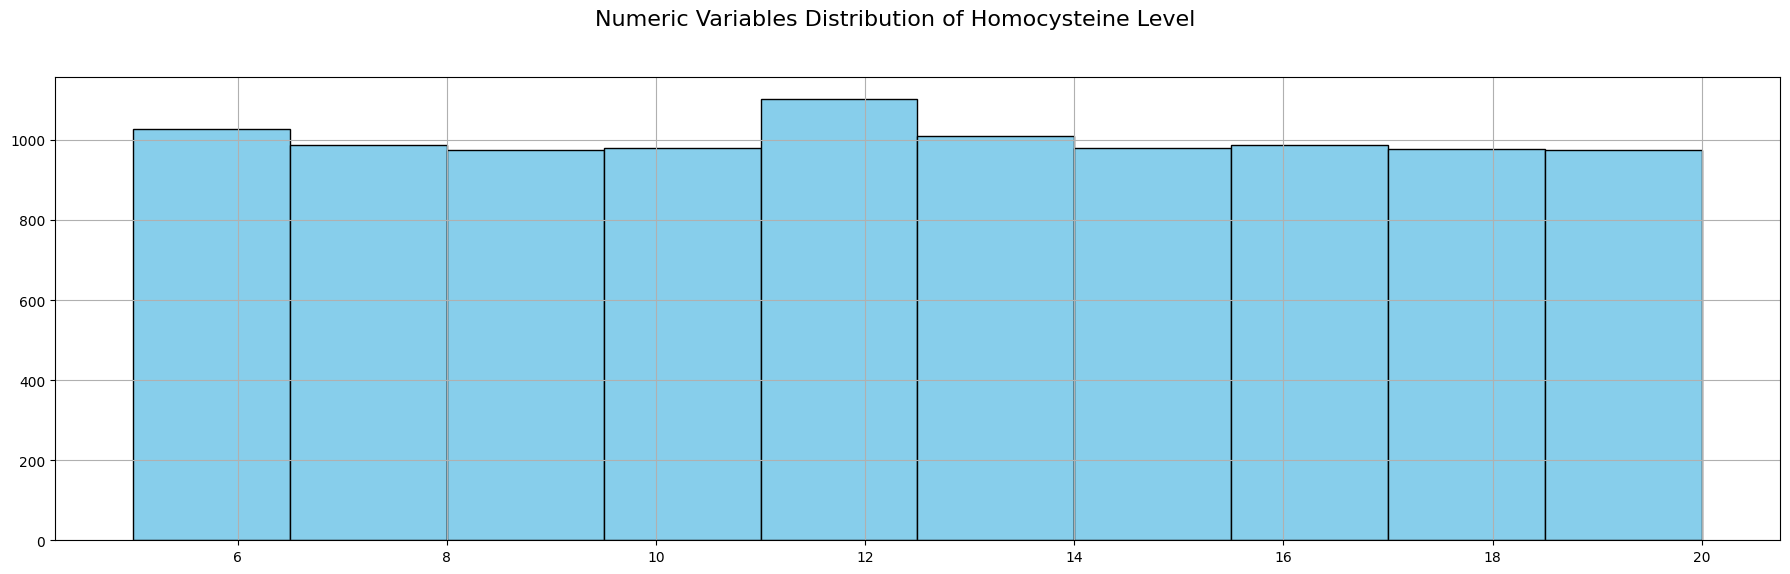

In [10]:
numerical_col=['Age','Blood Pressure', 'Cholesterol Level','BMI', 'Sleep Hours','Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level']
for col in numerical_col:
    plt.figure(figsize=(16,8))
    df[col].hist(figsize=(18,6),bins=10,color='skyblue',edgecolor='black')
    plt.suptitle(f"Numeric Variables Distribution of {col}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [11]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

<ipython-input-12-039c78f936d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=10)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


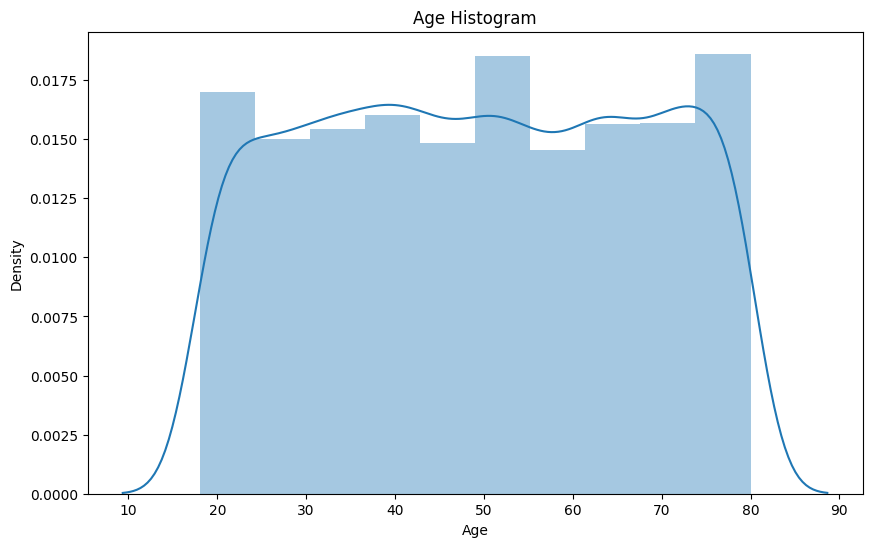

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.distplot(df['Age'],bins=10)
plt.title('Age Histogram')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

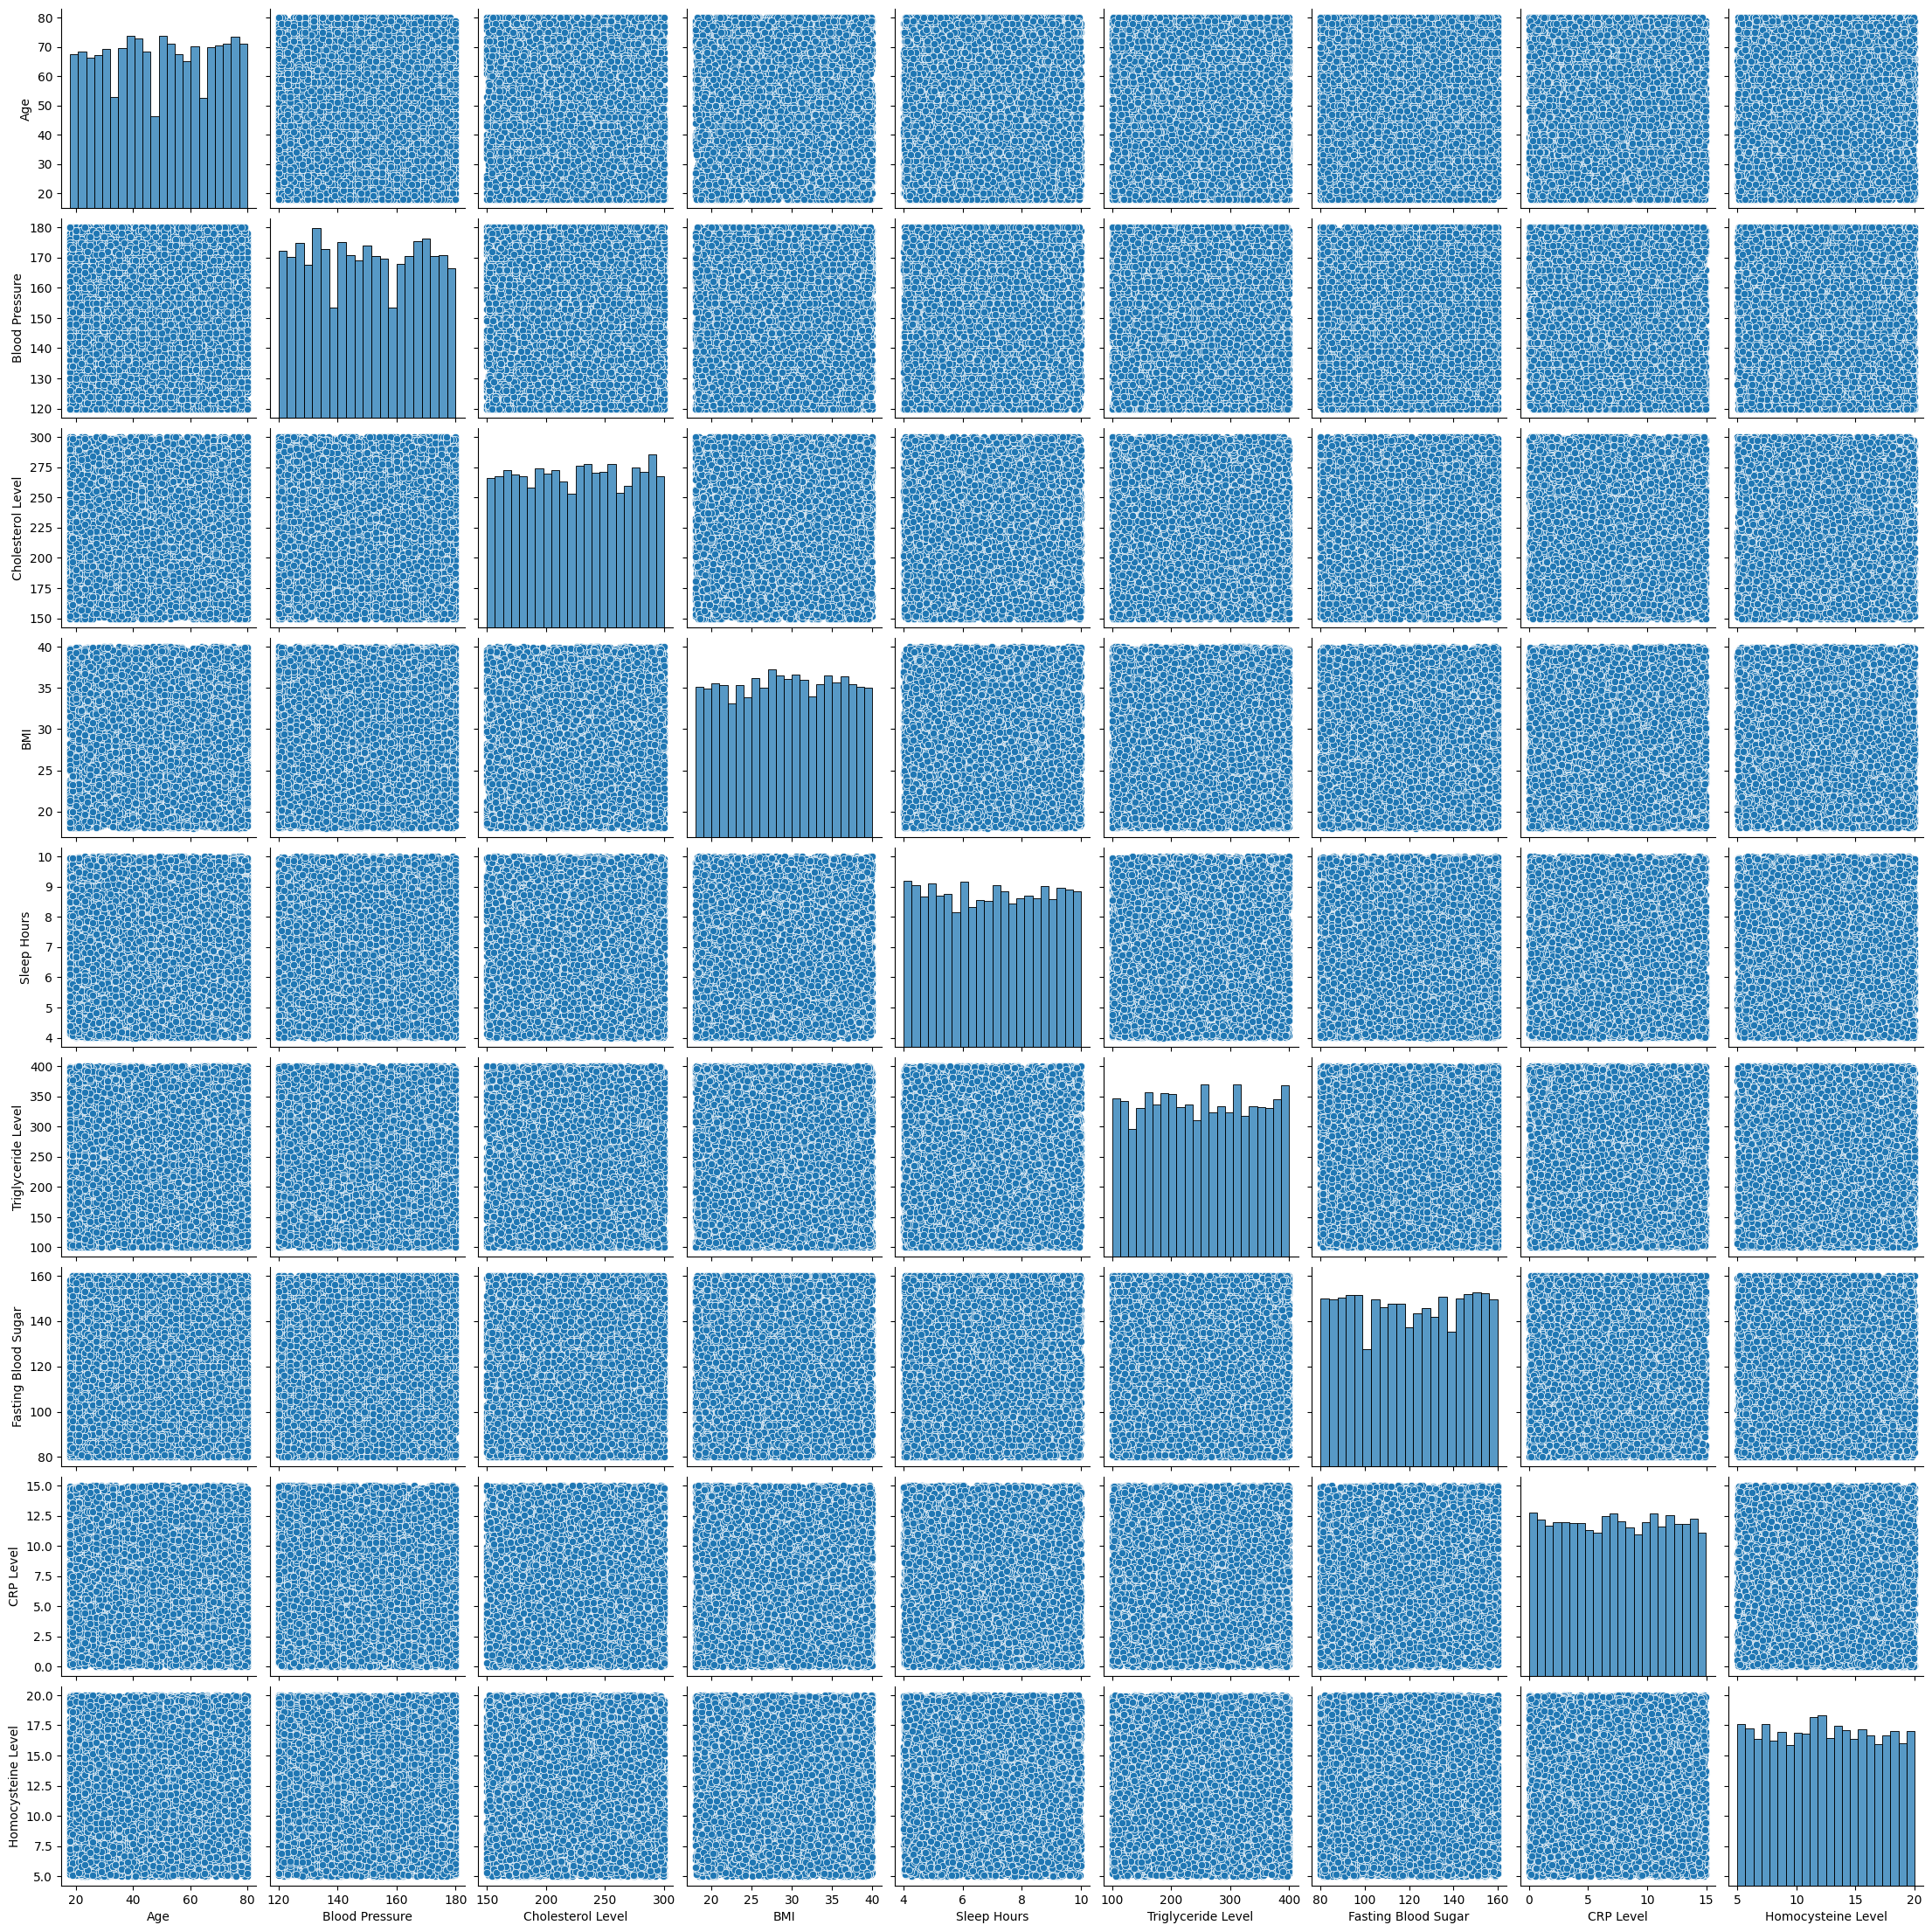

In [13]:
sns.pairplot(data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


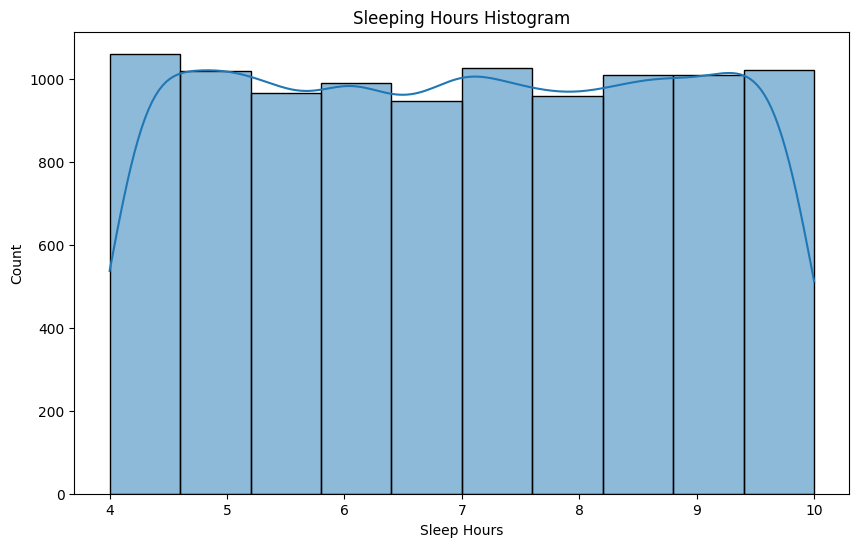

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Sleep Hours'],bins=10,kde=True)
plt.title('Sleeping Hours Histogram')
plt.show()

<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
    Exploratory Data Analysis Correlation Analysis
</h1>



<Axes: >

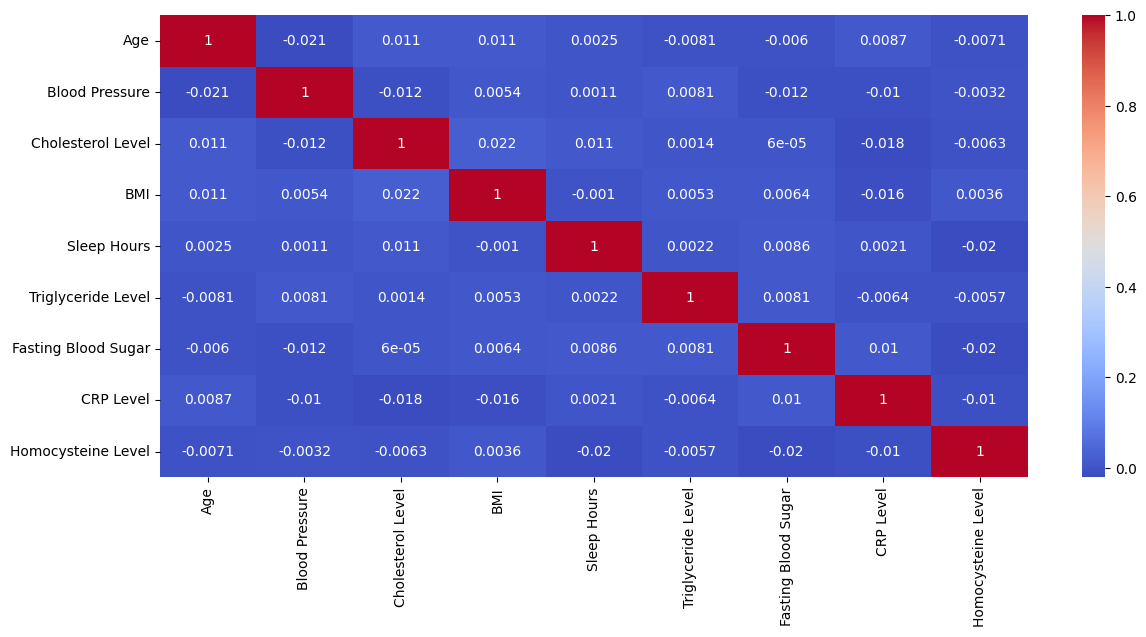

In [15]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
  Label Encoding
</h1>



In [16]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [17]:
df['Male']=pd.get_dummies(df['Gender'],drop_first=True,dtype=int)

In [18]:
df.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  Alcohol Consumption Stress Level Sleep Hours Sugar Consumption  \
0                High       Medium    7.633228            Medium   
1              Medium         High    8.744034            Medium   
2                 Low          Low    4.440440               Low   
3                 Low         High    5.249405              High   
4                 Low         High    7.030971              High   

   Triglyceride Level Fasting Blood Sugar  CRP Level  Homocysteine Level  \
0               342.0               120.0  12.969246           12.387250   
1               133.0               157.0   9.355389           19.298875   
2               393.0                92.0  12.709873           11.230926   
3               293.0                94.0  12.509046            5.961958   
4               263.0               154.0  10.381259            8.153887   

   Heart Disease Status  Male  
0                    No     1  
1                    No     0  
2                    No     1  
3                    No     0  
4                    No     1  

[5 rows x 22 columns]

In [19]:
df=df.drop('Gender',axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [21]:
columns_obj=['Exercise Habits','Smoking','Family Heart Disease','Diabetes','High Blood Pressure','High LDL Cholesterol','Low HDL Cholesterol','Alcohol Consumption','Stress Level','Sugar Consumption','Heart Disease Status']
for columns in columns_obj:
    df[columns]=label_encoder.fit_transform(df[columns])

In [22]:
df.head()

Age  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0           153.0              155.0                0        1   
1  69.0           146.0              286.0                0        0   
2  46.0           126.0              216.0                1        0   
3  32.0           122.0              293.0                0        1   
4  60.0           166.0              242.0                1        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  24.991591                    1   
1                     1         1  25.221799                    0   
2                     0         0  29.855447                    0   
3                     1         0  24.130477                    1   
4                     1         1  20.486289                    1   

   Low HDL Cholesterol  ...  Alcohol Consumption  Stress Level  Sleep Hours  \
0                    1  ...                    0             2     7.633228   
1                    1  ...                    2             0     8.744034   
2                    1  ...                    1             1     4.440440   
3                    0  ...                    1             0     5.249405   
4                    0  ...                    1             0     7.030971   

   Sugar Consumption  Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                  2               342.0                120.0  12.969246   
1                  2               133.0                157.0   9.355389   
2                  1               393.0                 92.0  12.709873   
3                  0               293.0                 94.0  12.509046   
4                  0               263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  Male  
0           12.387250                     0     1  
1           19.298875                     0     0  
2           11.230926                     0     1  
3            5.961958                     0     0  
4            8.153887                     0     1  

[5 rows x 21 columns]

# Train and Test Split Data

In [23]:
X=df.drop('Heart Disease Status',axis=1)
y=df['Heart Disease Status']

In [24]:
X.head()

Age  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0           153.0              155.0                0        1   
1  69.0           146.0              286.0                0        0   
2  46.0           126.0              216.0                1        0   
3  32.0           122.0              293.0                0        1   
4  60.0           166.0              242.0                1        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  24.991591                    1   
1                     1         1  25.221799                    0   
2                     0         0  29.855447                    0   
3                     1         0  24.130477                    1   
4                     1         1  20.486289                    1   

   Low HDL Cholesterol  High LDL Cholesterol  Alcohol Consumption  \
0                    1                     0                    0   
1                    1                     0                    2   
2                    1                     1                    1   
3                    0                     1                    1   
4                    0                     0                    1   

   Stress Level  Sleep Hours  Sugar Consumption  Triglyceride Level  \
0             2     7.633228                  2               342.0   
1             0     8.744034                  2               133.0   
2             1     4.440440                  1               393.0   
3             0     5.249405                  0               293.0   
4             0     7.030971                  0               263.0   

   Fasting Blood Sugar  CRP Level  Homocysteine Level  Male  
0                120.0  12.969246           12.387250     1  
1                157.0   9.355389           19.298875     0  
2                 92.0  12.709873           11.230926     1  
3                 94.0  12.509046            5.961958     0  
4                154.0  10.381259            8.153887     1

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
   Logistic Regression
</h1>

Logistic regression is a statistical model used for binary classification, predicting the probability of an outcome using a logistic function. It outputs probabilities between 0 and 1, which are then mapped to the closest class.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR=LogisticRegression()

In [29]:
LR.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lr_pred=LR.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1620
           1       0.00      0.00      0.00       380

    accuracy                           0.81      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.66      0.81      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1 style="background-color: #ffe4e1; color: #333; padding: 15px; border: 2px solid #ff82ab; border-radius: 15px; text-align: center; font-family: Verdana, sans-serif;">
   Positive and Negative Coefficients:
</h1>


In logistic regression, positive coefficients indicate that an increase in the corresponding feature increases the likelihood of the positive class, while negative coefficients suggest that an increase in the feature decreases the probability of the positive class.

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

In [34]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': LR.coef_[0]
})

# Interpret the coefficients
print(coefficients)

                 Feature  Coefficient
0                    Age    -0.002284
1         Blood Pressure    -0.005077
2      Cholesterol Level    -0.000340
3        Exercise Habits     0.003249
4                Smoking     0.000074
5   Family Heart Disease    -0.014660
6               Diabetes    -0.005948
7                    BMI     0.004756
8    High Blood Pressure    -0.000177
9    Low HDL Cholesterol    -0.012972
10  High LDL Cholesterol     0.007913
11   Alcohol Consumption    -0.045730
12          Stress Level     0.026844
13           Sleep Hours    -0.039870
14     Sugar Consumption    -0.030510
15    Triglyceride Level    -0.000075
16   Fasting Blood Sugar    -0.001186
17             CRP Level    -0.005240
18    Homocysteine Level    -0.000060
19                  Male    -0.028809
